In [3]:
#Santiago Alzate Quiceno
import pandas as pd
import numpy as np
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import nltk

df=pd.read_csv("/Users/santiagoalzate/Desktop/ny_precios.csv")
df

,F1,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242
...,...,...,...,...,...,...,...,...,...,...,...,...
17609,28313,23691588,Brooklyn,40.69312,-73.94073,Shared room,32,9,31,5,0.26,1
17610,17415,14712466,Brooklyn,40.65446,-73.92613,Shared room,99,7,100,1,0.03,0
17611,27827,23184420,Lower East Side,40.71172,-73.98864,Shared room,41,14,180,2,0.12,365
17612,29127,24555212,Manhattan,40.71113,-73.98840,Shared room,38,0,180,1,0.27,365


In [3]:
df.shape

(17614, 12)

In [8]:
df.head



<bound method NDFrame.head of           F1        id       neighbourhood  latitude  longitude  \
0          0      2595             Midtown  40.75362  -73.98377   
1          1      3831            Brooklyn  40.68514  -73.95976   
2          2      5099           Manhattan  40.74767  -73.97500   
3          3      5121  Bedford-Stuyvesant  40.68688  -73.95596   
4          4      5178           Manhattan  40.76489  -73.98493   
...      ...       ...                 ...       ...        ...   
17609  28313  23691588            Brooklyn  40.69312  -73.94073   
17610  17415  14712466            Brooklyn  40.65446  -73.92613   
17611  27827  23184420     Lower East Side  40.71172  -73.98864   
17612  29127  24555212           Manhattan  40.71113  -73.98840   
17613  25441  21628183           Manhattan  40.71165  -73.98708   

             room_type  price  days_occupied_in_2019  minimum_nights  \
0      Entire home/apt    225                     15              10   
1      Entire home/ap

In [5]:
df.columns

Index(['F1', 'id', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'price', 'days_occupied_in_2019', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'availability_2020'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17614 entries, 0 to 17613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   F1                     17614 non-null  int64  
 1   id                     17614 non-null  int64  
 2   neighbourhood          17614 non-null  object 
 3   latitude               17614 non-null  float64
 4   longitude              17614 non-null  float64
 5   room_type              17614 non-null  object 
 6   price                  17614 non-null  int64  
 7   days_occupied_in_2019  17614 non-null  int64  
 8   minimum_nights         17614 non-null  int64  
 9   number_of_reviews      17614 non-null  int64  
 10  reviews_per_month      17614 non-null  float64
 11  availability_2020      17614 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1.6+ MB


In [7]:
df.describe()

,F1,id,latitude,longitude,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
count,17614.000000,1.761400e+04,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000
mean,18547.564664,1.572032e+07,40.726755,-73.947732,145.455490,179.517656,7.392926,56.128988,1.607060,154.154763
std,11000.717341,9.644155e+06,0.056981,0.050213,194.990677,130.202015,19.233869,65.972370,1.635528,138.079651
min,0.000000,2.595000e+03,40.508680,-74.239860,0.000000,0.000000,1.000000,1.000000,0.010000,0.000000
25%,8192.250000,6.718288e+06,40.686042,-73.980938,70.000000,35.000000,2.000000,9.000000,0.340000,8.000000
50%,19496.500000,1.654699e+07,40.720540,-73.953050,109.000000,198.000000,3.000000,33.000000,1.060000,125.000000
75%,28686.750000,2.407707e+07,40.763127,-73.930682,170.000000,301.000000,5.000000,79.000000,2.460000,309.000000
max,35596.000000,3.056528e+07,40.908040,-73.721790,9999.000000,364.000000,1125.000000,675.000000,19.250000,365.000000


In [8]:
df.isnull().sum()

F1                       0
id                       0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                    0
days_occupied_in_2019    0
minimum_nights           0
number_of_reviews        0
reviews_per_month        0
availability_2020        0
dtype: int64

In [9]:
df.isnull()

,F1,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
17609,False,False,False,False,False,False,False,False,False,False,False,False
17610,False,False,False,False,False,False,False,False,False,False,False,False
17611,False,False,False,False,False,False,False,False,False,False,False,False
17612,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
len(df['F1'].unique())

17614

In [11]:
df['room_type'].value_counts()

Entire home/apt    9405
Private room       7752
Shared room         357
Hotel room          100
Name: room_type, dtype: int64

In [12]:
for column in df.columns:
    unique_values = df[column].nunique()
    value_counts = df[column].value_counts()
    print(f"Column name: {column}")
    print(f"Number of unique values: {unique_values}")
    print(f"Value counts:\n{value_counts}\n")

Column name: F1
Number of unique values: 17614
Value counts:
0        1
4390     1
23730    1
27301    1
2832     1
        ..
3704     1
31214    1
33387    1
17101    1
25441    1
Name: F1, Length: 17614, dtype: int64

Column name: id
Number of unique values: 17614
Value counts:
2595        1
3311830     1
20458769    1
22636785    1
1814783     1
           ..
2508374     1
26876289    1
29016112    1
14318774    1
21628183    1
Name: id, Length: 17614, dtype: int64

Column name: neighbourhood
Number of unique values: 186
Value counts:
Brooklyn              3875
Manhattan             3229
Queens                1099
Bedford-Stuyvesant     799
Harlem                 632
                      ... 
Sea Gate                 1
Marble Hill              1
Midland Beach            1
Mill Basin               1
Van Nest                 1
Name: neighbourhood, Length: 186, dtype: int64

Column name: latitude
Number of unique values: 11598
Value counts:
40.69454    8
40.68084    8
40.68374    8
4

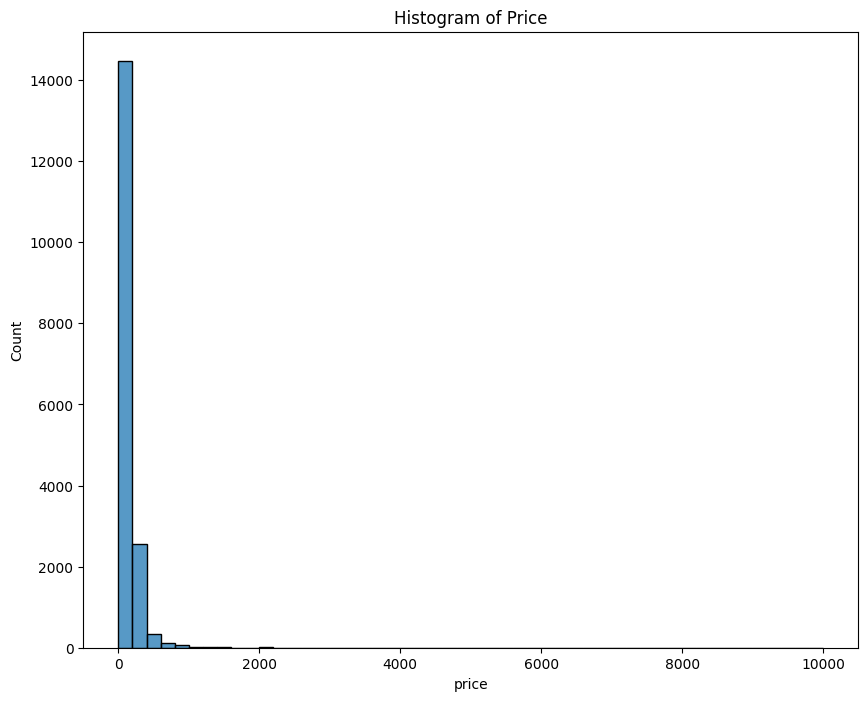

In [20]:
plt.figure(figsize=(10, 8))
sns.histplot(x='price', data=df, bins=50)
plt.title('Histogram of Price')
plt.show()

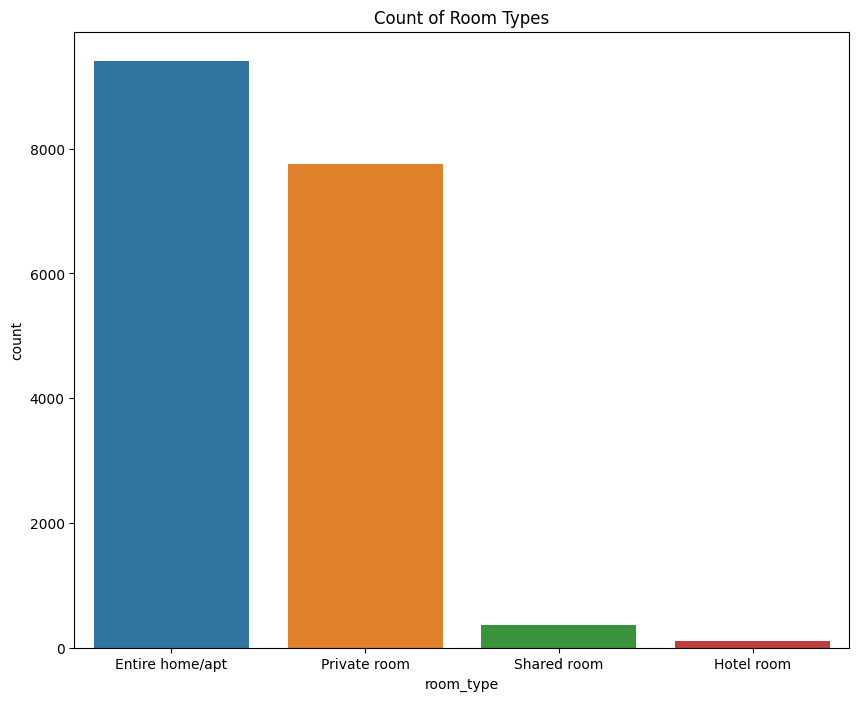

In [21]:
plt.figure(figsize=(10, 8))
sns.countplot(x='room_type', data=df)
plt.title('Count of Room Types')
plt.show()

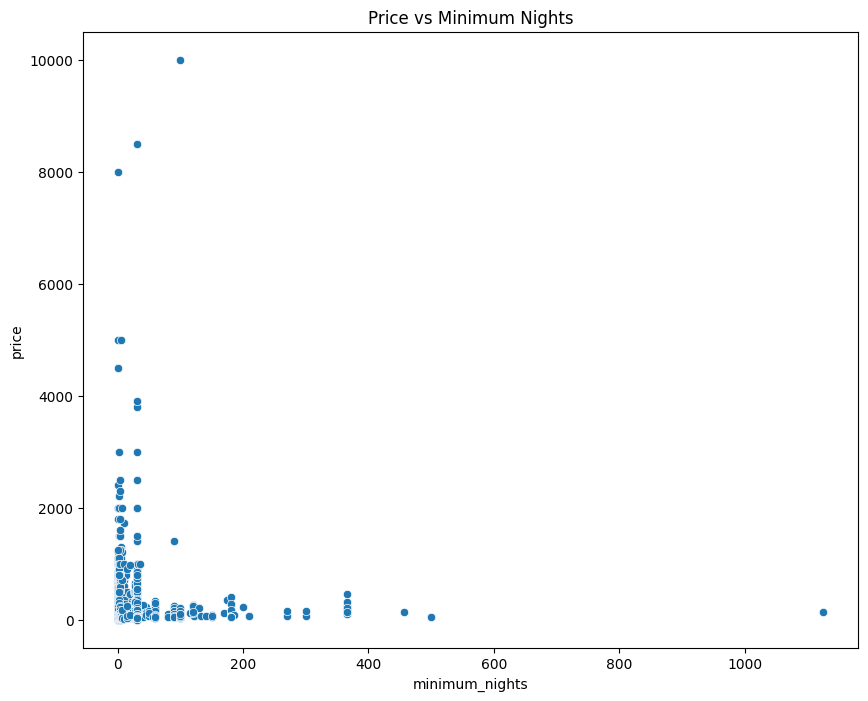

In [22]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='minimum_nights', y='price', data=df)
plt.title('Price vs Minimum Nights')
plt.show()

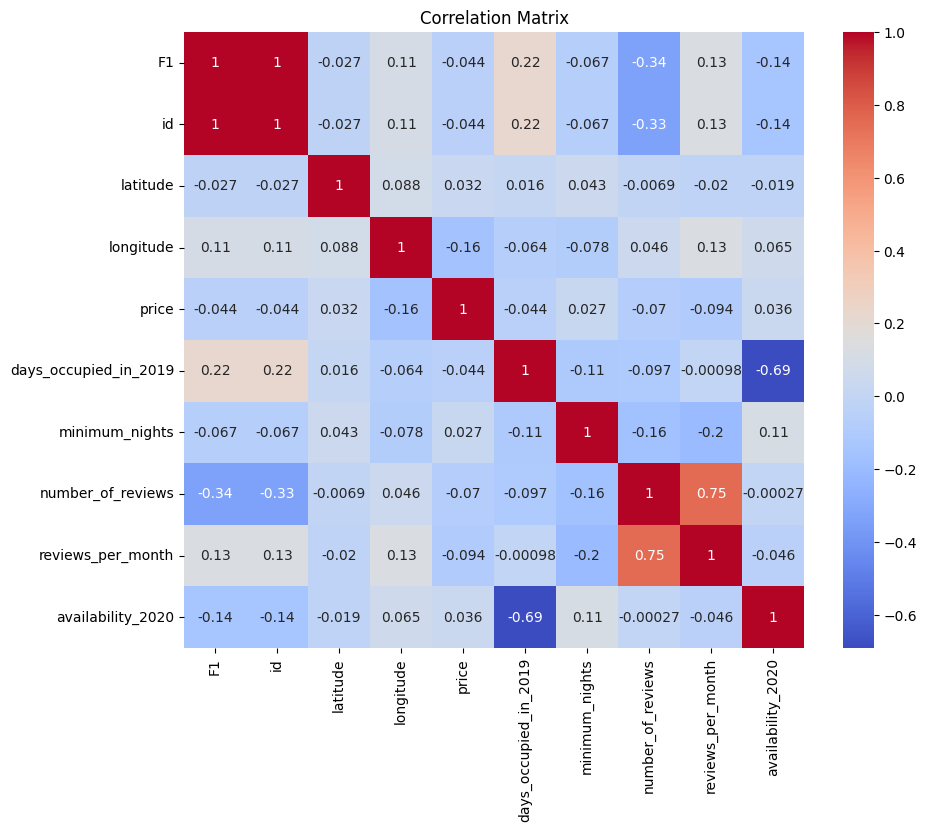

In [23]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
df.dtypes

F1                         int64
id                         int64
neighbourhood             object
latitude                 float64
longitude                float64
room_type                 object
price                      int64
days_occupied_in_2019      int64
minimum_nights             int64
number_of_reviews          int64
reviews_per_month        float64
availability_2020          int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train,y_train)
linear_pred=linear.predict(x_test)
linear_pred

In [ ]:
acc_lr=linear.score(x_test,y_test)
print(linear.score(x_test,y_test))
print(linear.score(x_train,y_train))

In [ ]:
sns.distplot(df['price'], bins=70)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X = df.drop(columns=['price'])
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import classification_report
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1),
    'Lasso Regression': Lasso(alpha=1),
    'Decision Tree Regression': DecisionTreeRegressor(max_depth=5),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, max_depth=5)}

In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
    
print('Model:', name)
print('R^2:', r2)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)


In [ ]:
plt.figure(figsize=(10, 6))
plt.title(f'{name} - Actual vs. Predicted')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()